{{ badge }}
$$\newcommand{\arr}[1]{\underline{\underline{#1}}}$$    
$$\newcommand{\vec}[1]{\underline{#1}}$$   
$$\require{mhchem}$$

# Boundary Value Problems

# Boundary value problems

Everything so far: Initial value problems
* Initial conditions specify state at a single value of the independent variable
\begin{align}
t = 0 \rightarrow y(t&=0) = y_0\\
y'(t&=0) = y_0'
\end{align}
These IVP will have one unique solution. Implicitly, we have assumed that y and y' are both defined at the initial condition, and that the system of differential equations is continuous over the solution interval.


$\underline{\text{Ex}}$: $y'' = 0 \hspace{2cm} y(0) = 2, \ y'(0) = 1$
\begin{align}
y(t) = ct + d\\
y(0) = 2 = d && \rightarrow \text{IC#1 gives intercept}\\
y'(0) = 1 = c && \text{IC#2 gives slope}
\end{align}
<img src="https://docs.google.com/drawings/d/e/2PACX-1vSNVeLRVsyZfMldybZ0H7ruztdfFi_KYe7AyRL4BJBvVXsilHEW1xnExjwPZvgynFmhaegVd_Nt7Waa/pub?w=558&h=283">

If we know information at two different points in the independent variable, we have a boundary value problem. 




## Example: pirate defense

<img src="https://docs.google.com/drawings/d/e/2PACX-1vS8IYpz71Hk-T1cKh7fey_X3rq7udSbmu3_npMcbmKlDp6JW5_4F2ib4_a_R1rQfQfsErUOrOVFsvcG/pub?w=558&h=283">

1. Analytical solution $\rightarrow$ apply all of our boundary conditions
\begin{align}
\frac{d}{dt}\begin{bmatrix}x\\z\\v_x\\v_z \end{bmatrix} = 
\begin{bmatrix} v_x\\v_z\\-rv_x\\-rv_z-g\end{bmatrix} \rightarrow \text{physics with air friction}
\end{align}
\begin{align}
x(t=0) = 0\\
z(t=0) = H\\
z(x=L) = 0 
\end{align}

That third condition is very strange!

The conditions that we would use if we were treating this as an initial value problem are:

\begin{align}
x(t=0) = 0\\
z(t=0) = H\\
v_x(t=0) = ?\\
v_z(t=0) = ?
\end{align}

Say we are firing from a 100m embankment and the pirate ship is 200m away. We want to find initial conditions for $v_x$ and $v_z$ such that we hit the pirate ship. Code this up and let's discuss. g = 9.8 [m/s^2] and r=0.1 [1/s]. Go ahead and try to solve this, starting from t=0 and integrating for 10 seconds.

Text(0, 0.5, 'z [m]')

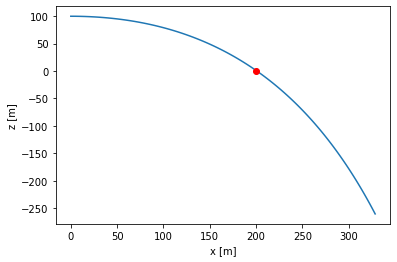

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

r = 0.1 #1/s
g = 9.8 #m/s^2
H = 100 # m
L = 200 # m

def diff_eq(t, y):
  x, z, vx, vz = y
  return [vx,
          vz,
          -r*vx,
          -r*vz-g]

y0 = [0,
      H,
      52, #m/s
      0] #m/s

t_span = [0,10]
t_eval = np.linspace(0,10,100)

sol = solve_ivp(diff_eq,
                t_span=t_span,
                y0=y0,
                t_eval=t_eval)

plt.plot(sol.y[0,:],
         sol.y[1,:])
plt.plot(200,0,'or')
plt.xlabel('x [m]')
plt.ylabel('z [m]')

Say that we know that the cannonballs were fired at a speed of 40 m/s, but the angle of firing could be adjusted (e.g. $v_x=v\cos \theta, v_z=v\sin\theta$). Is it possible to hit the pirate ship?

<img src="https://docs.google.com/drawings/d/e/2PACX-1vSirMOMoscySDHFqqvHliY_2SIP9iUjexxHkUXR9-wb55-6Rc7812RgMvNablhQbdNyuLvBykuXRw-z/pub?w=558&h=283">

Text(0, 0.5, 'z [m]')

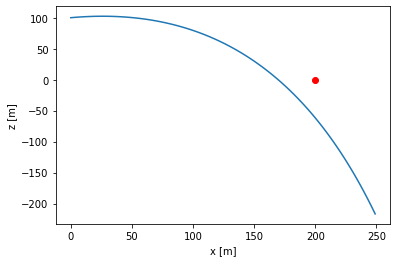

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

r = 0.1 #1/s
g = 9.8 #m/s^2
H = 100 # m
L = 200 # m

def diff_eq(t, y):
  x, z, vx, vz = y
  return [vx,
          vz,
          -r*vx,
          -r*vz-g]

v0 = 40 # m/s
theta = 10 # degree
y0 = [0,
      H,
      v0*np.cos(theta/360*2*np.pi), #m/s
      v0*np.sin(theta/360*2*np.pi)] #m/s

t_span = [0,10]
t_eval = np.linspace(0,10,100)

sol = solve_ivp(diff_eq,
                t_span=t_span,
                y0=y0,
                t_eval=t_eval)

plt.plot(sol.y[0,:],
         sol.y[1,:])
plt.plot(200,0,'or')
plt.xlabel('x [m]')
plt.ylabel('z [m]')

So, what did we learn?
* Sometimes there is a solution for BVPs
* Sometimes there are multiple solutions
* Sometimes there are no solutions
* There could even be infinite solutions

## Analytical solutions to BVPs

Analytical solutions to BVPs are usually not a problem to solve, just new boundary conditions. 

$\underline{\text{Ex}}$: $2^{nd}$ order ODE would be specified by 
\begin{align}
y(x=x_1) = y_1\\
y(x=x_2) = y_2
\end{align}
Can have
  * no solutions
  * one solution
  * infinite solutions

$\underline{\text{Ex}}$: 
\begin{align}
y'' + \lambda y = 0 && \rightarrow \text{rod of length $L$}\\
y(0) = 0\\
y(L) = 0
\end{align}
<img src="https://docs.google.com/drawings/d/e/2PACX-1vTNc_QrhMpifVPYHo97k0unsTfSIaXxcGtlenDmBgEDflWCgZLJMiRX0YnJGTY59jG3raWwV9G9ol6h/pub?w=558&h=283">
\begin{equation}
  y(x)=\begin{cases}
    A\cos\sqrt{\lambda}x + B \sin\sqrt{\lambda}x & \lambda \neq 0\\
    cx + d & \lambda = 0
  \end{cases}
\end{equation}
* If $\lambda = 0$, only $c,d$ allowed with boundary conditions is trivial solution
* If $\lambda \neq 0$ and $A$ or $B$ not 0, $y(x) = B\sin\sqrt{\lambda}x$ is a solution only if $\lambda = \left(\frac{n\pi}{L}\right)^2\rightarrow$ infinite number of solutions


### Example BVP:
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQNHZ8qPCfOaQ8wijQvv8p8fpKl2glMQFUwRcXAH52dLoyosfkg7Z97PX7ue-YjuAxsZtUi8jeK8AnR/pub?w=558&h=283">

If we apply axial load or pressure, we will eventually have a buckle
<img src="https://docs.google.com/drawings/d/e/2PACX-1vTIRTh0c7JNP8mGPdD2etliwqxqQfMXdtbLpJE7sUDRBPIjSHLNClCIgj1ImC3gbYXzWjFRT_rav7l5/pub?w=558&h=283">

As engineers, we care about shape
  * Also care about critical $P$
\begin{align}
EIy'''' + Py'' = 0
\end{align}
BC:
\begin{align}
y(x=0) = 0 && y'(x=L) = 0\\
y(x=L) = 0 && y''(x=0) = 0
\end{align}
\begin{align}
y'''' + \lambda y'' = 0 && \lambda \equiv \frac{P}{EI}\\
F \equiv y'' \rightarrow && F'' + \lambda F = 0
\end{align}

Two cases!
1. $\lambda = 0$

\begin{align*}
\int y'''' &= \int 0 \\
\int y''' &= \int a \\
y'' &= ax + b\\
y &= c_1x^3 + c_2x^2 + c_3x + c_4
\end{align*}
apply BC:
\begin{align}
y(c&=0) = 0 = c_4\\
y''(x&=0) = 0 = 2c_2\\
y(x&=L) = 0 = c_1L^3 + c_3L \rightarrow c_3 = -c_1L^2\\
y'(x&=L) = 0 = 3c_1L^2 + c_3 \rightarrow c_1 = 0 = c_3
\end{align}
For $\lambda = 0, \ y(x) = 0 \rightarrow$ trivial / no solution\
This is the solution if $P=0$
2. $\lambda \neq 0 \rightarrow y'''' + \lambda y'' = 0$ \
guess $y(x) = e^{rx}$\
plug in:
\begin{align}
r^4e^{rx} + \lambda r^2e^{rx} = 0\\
r^4 + \lambda r^2 = 0\\
r^2(r^2 + \lambda) = 0\\
r = 0,\ 0,\ \pm i\sqrt{\lambda} \\
\end{align}
\begin{align}
y_1 &= e^{0x}\\
y_2 &= xe^{0x}\\
y_3 &= \sin\sqrt{\lambda}x\\
y_4 &= \cos\sqrt{\lambda}x
\end{align}
\begin{align}
y(x) &= c_1 + c_2x + c_3\sin\sqrt{\lambda}x + c_4\cos\sqrt{\lambda}x\\
y'(x) &= c_2 + c_3\sqrt{\lambda}\cos\sqrt{\lambda}x - c_4\sqrt{\lambda}\sin\sqrt{\lambda}x\\
y''(x) &= -c_3\lambda\sin\sqrt{\lambda}x - c_4\lambda\cos\sqrt{\lambda}x
\end{align}
BC:

1.\begin{align}
y(x=0) = 0 = c_1 + c_4
\end{align}
2.\begin{align}
y''(x=0) = 0 = -c_4 \lambda \rightarrow c_4 = 0, \ c_1 = 0
\end{align}
3.\begin{align}
y(x=L) = 0 &= c_2L + c_3\sin\sqrt{\lambda}L\\
c_2 & = -\frac{1}{L}c_3\sin\sqrt{\lambda}L
\end{align}
4.\begin{align}
y'(x=L) = 0 &= c_2 + c_3\sqrt{\lambda}\cos\sqrt{\lambda}L\\
0 &= -\frac{1}{L}c_3\sin\sqrt{\lambda}L + c_3\sqrt{\lambda}\cos\sqrt{\lambda}L\\
&= c_3(\sqrt{\lambda}L\cos\sqrt{\lambda}L - \sin\sqrt{\lambda}L)
\end{align}
Only situation without trivial solution is if
\begin{align}
\sqrt{\lambda}L\cos\sqrt{\lambda}L - \sin\sqrt{\lambda}L = 0\\
\rightarrow \tan\sqrt{\lambda}L = \sqrt{\lambda}L \rightarrow \tan x = x 
\end{align}

<img src="https://docs.google.com/drawings/d/e/2PACX-1vR-WnIunOQjjauqlmNGvuq83eLzIUUXSaT2SCCEboAIfRNN_tovUiRqnTai2qE6AJAt89KyQPMGRK_p/pub?w=558&h=283">

$\rightarrow$ infinite number of solutions but only care about the first one (smallest $P$)
\begin{align}
\sqrt{\lambda}L &= 4.4934...\\
\lambda_1 &= \frac{(4.493)^2}{L^2}\\
P &= \lambda EI \rightarrow P_{max} = \frac{(4.49)^2}{L^2}EI \approx \frac{20.2}{L^2}EI
\end{align}
<img src="https://docs.google.com/drawings/d/e/2PACX-1vSURwQwSBZz53abjZQE1Ks9Fw38ZnrUyY19eQUy8jcZd699XcMdmtQKEg_f-6HJkvPYgpGpRYd0-EQu/pub?w=558&h=283">

Text(0, 0.5, 'y')

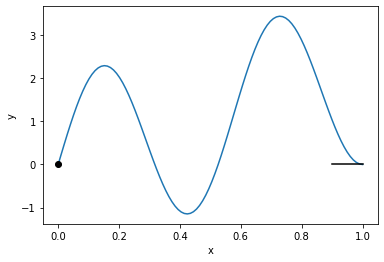

In [52]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt

L = 1
sol = root(lambda x: np.tan(x)-x, 4+np.pi*4)

rootLambdaL = sol.x
lambdaSol = (rootLambdaL/L)**2

c3 = 2
c2 = -c3*np.sin(np.sqrt(lambdaSol)*L)/L

xrange = np.linspace(0,L,100)
plt.plot(xrange,
         c2*xrange+c3*np.sin(np.sqrt(lambdaSol)*xrange))

plt.plot(0,0,'ok')
plt.plot([0.9,1],[0,0],'-k')
plt.xlabel('x')
plt.ylabel('y')



In [ ]:
plt.xlabel('x')
